In [1]:
from neurosynth.base.dataset import Dataset
from owlready2 import get_ontology
from neurosynth.analysis import meta
import nibabel as nib
import nilearn as nil
import numpy as np
from neurolang.frontend.fma_ontolgy_utils import FMAOntology
from neurolang import frontend as fe
from nilearn import plotting

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/solver_datalog_naive.py:23: UserWarning: This module is being deprecated please use the datalog module
  warn("This module is being deprecated please use the datalog module")
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/expression_pattern_matching.py:87: UserWarning: Warning in class SolverNonRecursiveDatalogNaive overwri

In [2]:
fma = FMAOntology('fma.owl')
fma.load_ontology()

nl = fe.NeurolangDL()
nl = fma.init_ontology(nl, destriuex_relations=True)

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/datalog/aggregation.py:132: UserWarning: No check performed. Should implement check for stratified aggregation
  "No check performed. Should implement check for stratified"


In [3]:
@nl.add_symbol
def region_volume(region: fe.ExplicitVBR) -> float:
    volume = (
        len(region.voxels) *
        float(np.product(np.abs(np.linalg.eigvals(region.affine[:-1, :-1]))))
    )
    return volume

In [4]:
with nl.environment as e:
    res = nl.query(e.val(e.y), e.isSub('Gyrus of parietal lobe', e.y)) 
res

val: typing.AbstractSet[typing.Tuple[str]] = [('Right postcentral gyrus',), ('Left postcentral gyrus',), ('Right precuneus',), ('Left precuneus',), ('Right superior parietal lobule',), ('Left superior parietal lobule',), ('Right inferior parietal lobule',), ('Left inferior parietal lobule',)]

In [5]:
neurosynth_superior = nl.load_neurosynth_term_regions(
    '*superior*',
    name='neurosynth_superior'
)

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:435: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/frontend/neurosynth_data/dataset.pkl'>
  dataset = pickle.load(open(filename, 'rb'))
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:716: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  feature_weights = self.data.ix[:, features]
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/pandas/core/indexing.py:888: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  retv

/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/datalog/aggregation.py:132: UserWarning: No check performed. Should implement check for stratified aggregation
  "No check performed. Should implement check for stratified"
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/scipy/ndimage/measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/nilearn/plotting/displays.py:600: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(axes, collections.Sequence):


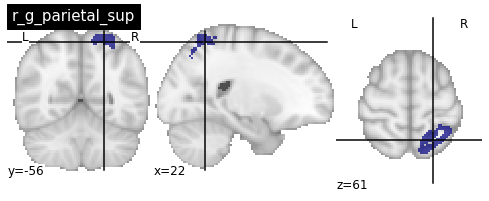

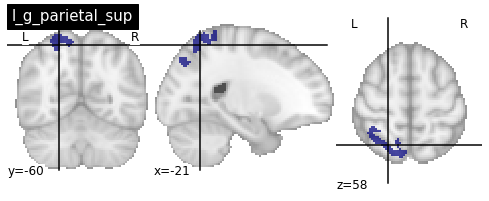

In [6]:
with nl.environment as e:
    res = nl.query(
        e.query(e.y, e.region_1),
        e.isSub('Gyrus of parietal lobe', e.x) & e.relation(e.y, e.x) &
        e.destrieux_regions(e.y, e.region_1) & e.neurosynth_superior(e.region_2) &
        (e.region_volume(e.region_2) > 1500) &
        nl.symbols.overlapping(e.region_1, e.region_2)
    )
    
for name, region in res.value:
    plotting.plot_roi(region.spatial_image(), title=name)

In [7]:
with nl.environment as e:
    res2 = nl.query(
        e.query(e.y, e.region_1),
        #isSub('Gyrus of parietal lobe', x) & relation(y, x) &
        e.relation(e.y, 'Left superior parietal lobule') &
        e.destrieux(e.y, e.region_1) & e.neurosynth_superior(e.region_2) &
        (e.region_volume(e.region_2) > 1500) &
        nl.symbols.overlapping(e.region_1, e.region_2)
    )
for name, region in res2.value:
    plotting.plot_roi(region.spatial_image(), title=name)

/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/datalog/aggregation.py:132: UserWarning: No check performed. Should implement check for stratified aggregation
  "No check performed. Should implement check for stratified"


In [8]:
neurosynth_occipitotemporal = nl.load_neurosynth_term_regions(
    'occipitotemporal',
    name='neurosynth_occipitotemporal'
)

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/dataset.py:716: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  feature_weights = self.data.ix[:, features]
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/pandas/core/indexing.py:888: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/neurosynth/base/mask.py:232: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Wi

/Users/gzanitti/Projects/INRIA/NeuroLang/neurolang/datalog/aggregation.py:132: UserWarning: No check performed. Should implement check for stratified aggregation
  "No check performed. Should implement check for stratified"
/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/scipy/ndimage/measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


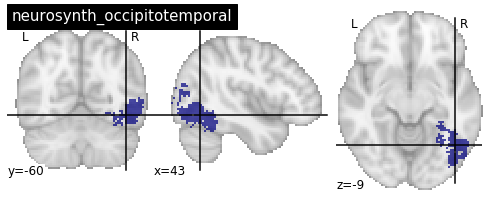

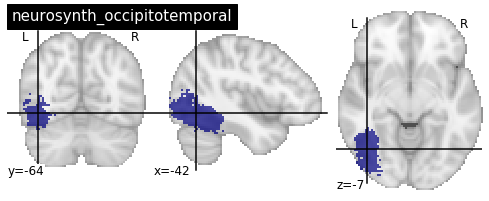

In [9]:
with nl.environment as e:
    res3 = nl.query(
        e.query('neurosynth_occipitotemporal', e.region_2),
        e.neurosynth_occipitotemporal(e.region_2) &
        (e.region_volume(e.region_2) > 1500)
    )
for name, region in res3.value:
    plotting.plot_roi(region.spatial_image(), title=name)

/Users/gzanitti/miniconda3/envs/neurolang/lib/python3.7/site-packages/scipy/ndimage/measurements.py:305: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


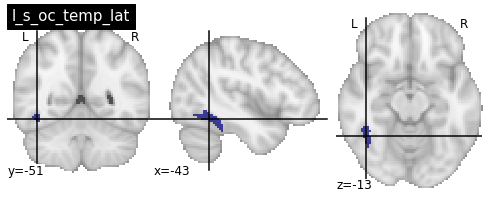

In [10]:
with nl.environment as e:
    res4 = nl.query(
        e.query(e.y, e.region_1),
        e.destrieux_regions(e.y, e.region_1) &
        e.relation(e.y, 'Left occipitotemporal sulcus')
    )

for name, region in res4.value:
    plotting.plot_roi(region.spatial_image(), title=name)